# Prodigy infotech Machine learning Task - 2

## Statement: Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

## uploading dataset from kaggle

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.82MB/s]


### Zip file extracting

In [5]:
from zipfile import ZipFile
with ZipFile('/content/customer-segmentation-tutorial-in-python.zip','r') as zipObj:
  zipObj.extractall('/content/Mall')

In [6]:
import pandas as pd

# Reading data from a CSV file
data = pd.read_csv('/content/Mall/Mall_Customers.csv')

# Displaying the first lines of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Checking for missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Data statistic analysis

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data preprocessing

In [9]:
# Removal of the "Customer ID" column
data = data.drop(columns=['CustomerID'])

# Converting the values ​​of the "Gender" column to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [10]:
# Data Normalization from
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Conversion to DataFrame with original columns data scaled
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

### Data Normalised scaled data

In [11]:
data_scaled.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-7.549517e-17,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.128152e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-1.128152e+00,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,8.864053e-01,7.284319e-01,6.656748e-01,8.851316e-01
max,8.864053e-01,2.235532e+00,2.917671e+00,1.894492e+00


In [12]:
# Importing libraries for clustering and visualization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determination of inertia for different values ​​of k inertia
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

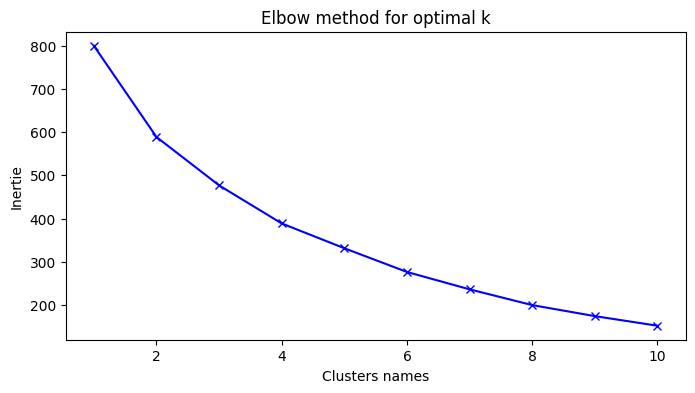

In [13]:
# Display of the elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Clusters names')
plt.ylabel('Inertie')
plt.title('Elbow method for optimal k')
plt.show()

In [14]:
# Choosing the number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Assigning cluster labels data['Cluster']
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# Displaying the first rows of data with clusters
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3


### Visualisation data clusters

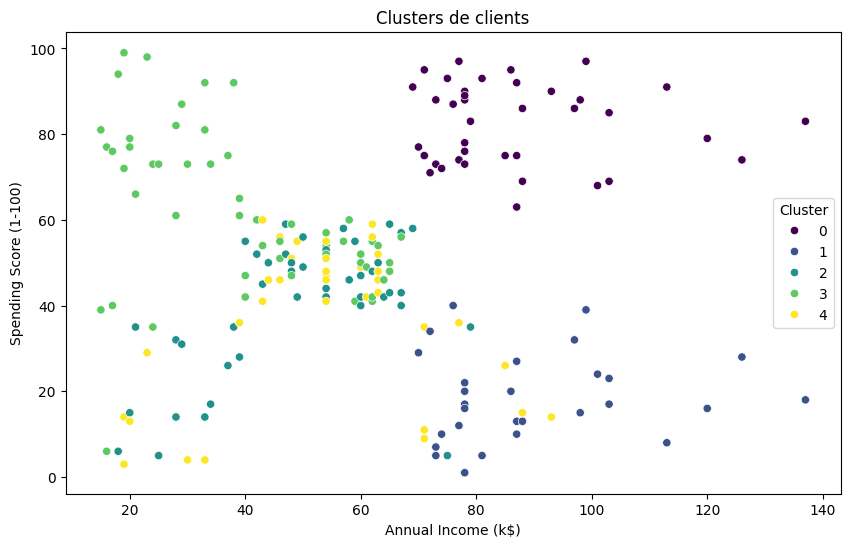

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters de clients')
plt.show()

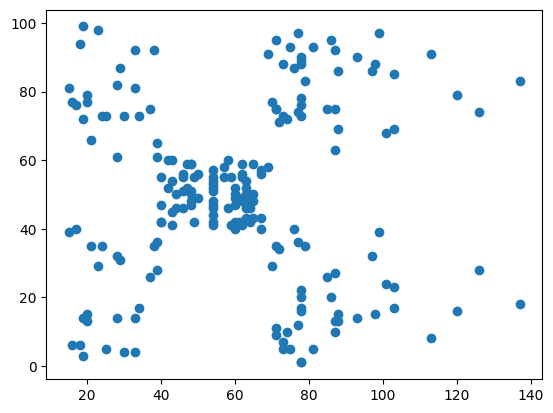

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

### Different features scattered

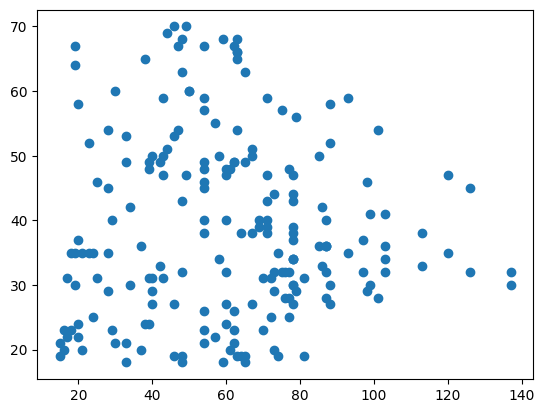

In [20]:
import matplotlib.pyplot as pit

plt.scatter(data["Annual Income (k$)"],data["Age"])

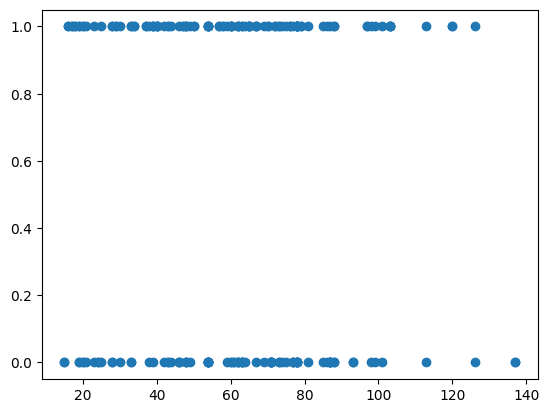

In [26]:
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income (k$)'],data['Gender'])

In [27]:
# Cluster analysis by calculating the average of the characteristics
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.538462  32.692308           86.538462               82.128205
1        0.551724  36.482759           89.517241               18.000000
2        1.000000  49.813953           49.232558               40.069767
3        0.592593  24.907407           39.722222               61.203704
4        0.000000  55.714286           53.685714               36.771429
